In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jun  2 11:09:55 2018

@author: Marcelo
"""

from sys import platform
from scipy.signal import (find_peaks, peak_widths)
# from pathlib import Path, PurePath
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
# 2018, Junho - usar os padroes deste notebook para
# ajuste nao linear com parametros variaveis

In [3]:

def mais(a,b):
    return a+b

def mais_geral(*a):
    return sum(a)

def faz(opera,a,b):
    return opera(a,b)

def expmaisk2(x,*locl):
    # d=locl[0]
    # h=locl[1]
    # k=locl[2]
    # c=locl[3]
    return locl[1]*np.exp(locl[2]*(x-locl[0]))+locl[3]

def expmaisk1(x,d,h,k,c):
    return h*np.exp(k*(x-d))+c

def expmaisk_d(x,h,k,c):
    return expmaisk1(x,50,h,k,c)

In [4]:
mais_geral(19,23,75,24)

141

In [5]:
# mais(5,9,5,7,8)  nao funciona, pois takes 2 positional args

In [6]:
print (faz(mais,13,9))
expmaisk1(150.0, 50.0, 7.0, 0.02, 3.0)

22


54.72339269251455

In [7]:

xs = np.linspace(100, 200)
ys= expmaisk1(xs, 50.0, 7.0, 0.02, 3.0)
# ...............d...h..k.....c.
rs = 5 * np.random.normal(size=xs.size)

print('yrs: ')
yrs = ys + rs
print(yrs)

# popt, pcov = curve_fit(expmaisk1, xs, yrs)  # nao funciona

popt1, pcov1 = curve_fit(expmaisk1, xs, yrs,
                      p0=(40.0, 9.0, 0.015, 3.5))  
# ........................d.....h....k.....c.

popt2, pcov2 = curve_fit(expmaisk1, xs, yrs,
                      p0=(45.0, 8.0, 0.03, 4.5))  
# ........................d.....h....k.....c.

popt3, pcov3 = curve_fit(expmaisk1, xs, yrs,
                       bounds=([ 20.0,  5.0, 0.0,  0.0],
                               [200.0, 10.0, 0.1, 20.0]))
# ................................d.....h....k.....c.

# popt, pcov = curve_fit(expmaisk_d, xs, yrs)
# popt, pcov = curve_fit(expmaisk_d, xs, yrs,
#                        bounds=([5.0,  0.0,  0.0],
#                                [10.0, 0.1, 20.0]))
print (popt1, popt2, popt3)


yrs: 
[ 19.73100007  22.75992762  29.22697002  16.65172718  25.9735184
  22.55469361  37.21638436  27.02534747  24.94636219  33.94685057
  27.97407814  32.9742846   35.8605588   26.55624622  34.02136297
  33.26059573  41.40545345  43.74186964  48.95586871  40.33640792
  39.90472337  46.14568559  55.2482016   51.911962    53.64008432
  58.33109376  60.70221904  64.92420812  72.11033706  71.93594856
  69.40373464  72.64330857  76.3740619   80.27346435  78.97619543
  79.03366414  83.00034632  91.8279733   91.19085332  95.98233016
 100.3417701  104.8600659  107.58238038 111.54544462 121.70844663
 119.04691863 127.08648096 129.18030266 142.7550211  136.90369019]
[ 5.30105946e+01  1.13876610e+01  1.73696258e-02 -5.34632209e+00] [ 1.93320889e+01  6.34424047e+00  1.73696255e-02 -5.34632332e+00] [5.46421168e+01 9.26806215e+00 1.87828135e-02 1.45803755e-16]


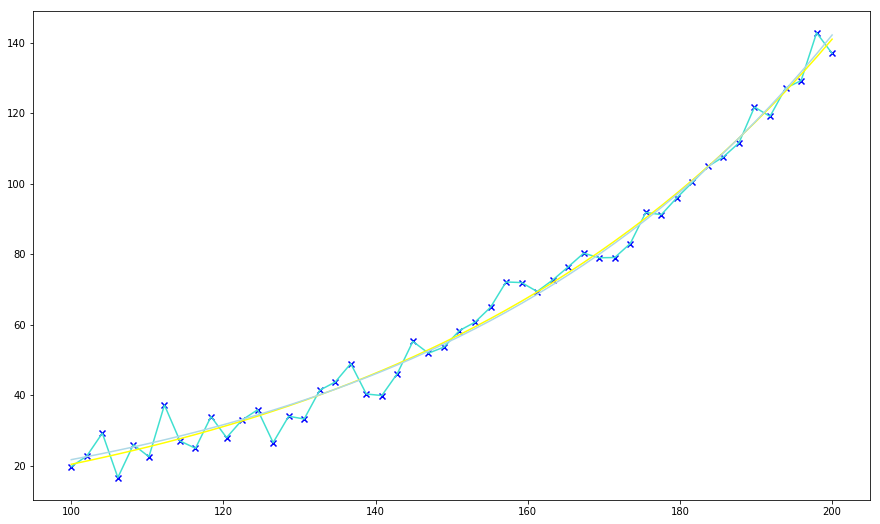

In [8]:
figA, axA = plt.subplots(1, 1, figsize=(15,9))
axA.scatter(xs, yrs, marker='x', color='blue')
axA.plot(xs, yrs, color='turquoise')
# axA.plot(xs, expmaisk1(xs, *popt1), color='green')
axA.plot(xs, expmaisk1(xs, *popt2), color='yellow')
axA.plot(xs, expmaisk1(xs, *popt3), color='lightblue')

In [9]:

xs = np.linspace(100, 200)
ys= expmaisk2(xs, 50.0, 7.0, 0.02, 3.0)
# ........  .......d..  .h.  .k.....c.
rs = 5 * np.random.normal(size=xs.size)

print('yrs: ')
yrs = ys + rs
print(yrs)

popt, pcov = curve_fit(expmaisk2, xs, yrs,
                      p0=(40.0, 9.0, 0.015, 3.5))  
# ........................d.....h....k.....c.
print (popt)


yrs: 
[ 19.5837344   18.90215241  23.5415832   26.54122174  23.96675289
  25.01962421  34.21918446  31.01505166  18.16855306  26.79304826
  37.10617346  31.87831614  29.21035311  34.20091015  35.41150067
  42.15703964  36.36742827  37.55932704  38.09446348  42.42841842
  39.60814176  38.84450742  47.30149167  44.38329791  60.93357628
  56.26622204  60.79533592  52.9527208   67.60112768  58.84713385
  64.20614097  77.80540046  72.78907677  76.30245187  77.09700292
  83.48281858  83.77694718  87.7252972   93.57846934  93.02348363
  91.91820673 103.55894203 113.45197654 123.0003093  114.79962211
 125.45609659 126.32885375 131.98468331 136.52575115 156.80505707]
[5.77633014e+01 6.09567584e+00 2.21342118e-02 5.88107600e+00]


In [10]:
xs.shape

(50,)

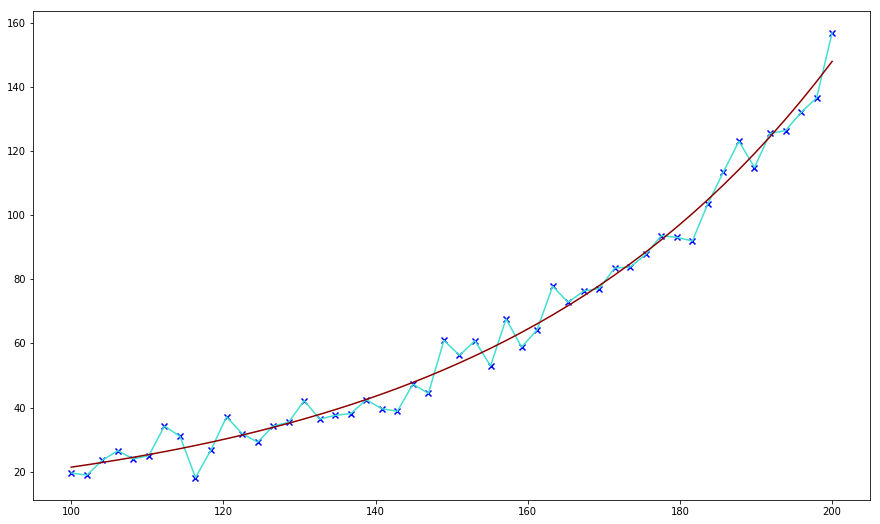

In [11]:
figB, axB = plt.subplots(1, 1, figsize=(15,9))
axB.scatter(xs, yrs, marker='x', color='blue')
axB.plot(xs, yrs, color='turquoise')
axB.plot(xs, expmaisk2(xs, *popt), color='darkred')

In [12]:
# Definindo fun,c~ao com k fixo
def g1(k):
    def g2(x, d, h, c):
        return expmaisk2(x,d,h,k,c)
    return g2

In [13]:
# testes
g3 = g1(0.02)
g3_140 = g3( 140.0, 50.0, 7.0, 3.0 )
print('g3: ', g3)
print(g3_140)

g3:  <function g1.<locals>.g2 at 0x000002105FEE3E18>
45.34753225089062


In [14]:


# Fixando k = 0.02
popt, pcov = curve_fit(g1(0.02), xs, yrs,
                      p0=(40.0, 9.0, 3.5))  
# ........................d.....h.....c.
print (popt)
popt_ins = np.insert(popt, 2, 0.02)
print(popt_ins)
print (np.sqrt(np.diag(pcov)) )


[116.56500249  27.41224892   0.19030167]
[1.16565002e+02 2.74122489e+01 2.00000000e-02 1.90301674e-01]
[nan nan  0.]


C:\Users\mmaduar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


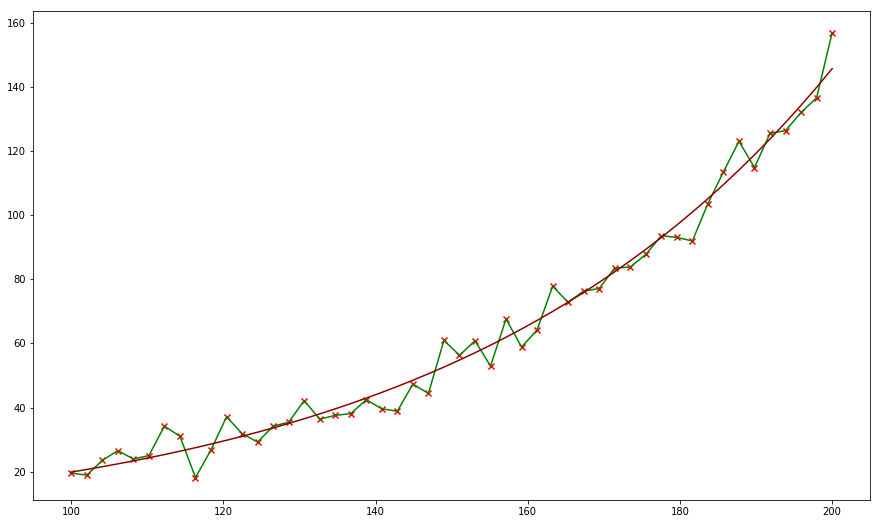

In [15]:
figB, axB = plt.subplots(1, 1, figsize=(15,9))
axB.scatter(xs, yrs, marker='x', color='red')
axB.plot(xs, yrs, color='green')
axB.plot(xs, expmaisk2(xs, *popt_ins), color='darkred')

In [16]:

# https://stackoverflow.com/questions/18326524/pass-tuple-as-input-argument-for-scipy-optimize-curve-fit
# https://pythontips.com/2013/08/04/args-and-kwargs-in-python-explained/
# ver tambem como usa keyword p0
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

def expmaisk2(x,*args):
    locl = args
    d=locl[0]
    h=locl[1]
    k=locl[2]
    c=locl[3]
    print (args)
    return h*np.exp(k*(x-d))+c

def f(x, *p):
    return sum( [p[i]*x**i for i in range(len(p))] )

print (expmaisk2(150.0, 50.0, 7.0, 0.02, 3.0), f(2,0, 7, 34, 4, 3))

(50.0, 7.0, 0.02, 3.0)
54.72339269251455 230


In [17]:
print (f(3,7,4), f(6), f(3,7,3,9,6,5))

19 0 664


(50.0, 7.0, 0.02, 3.0)


ValueError: Unable to determine number of fit parameters.

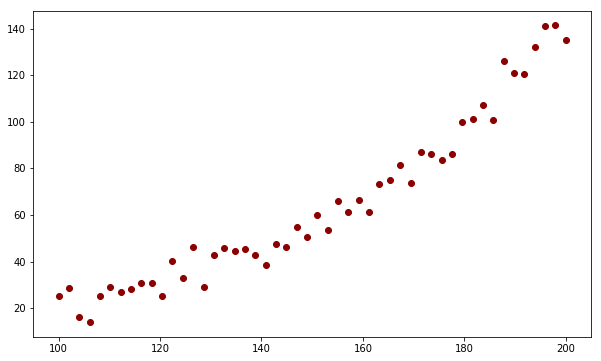

In [18]:
# xs = np.linspace(100, 200) (jah foi calculado acima)
ys= expmaisk2(xs, 50.0, 7.0, 0.02, 3.0)
# ...............d...h..k.....c.
rs = 5 * np.random.normal(size=xs.size)
yrs = ys + rs
figA, axA = plt.subplots(1, 1, figsize=(10,6))
outA = axA.scatter(xs, yrs, marker='o', color='darkred')

popt, pcov = curve_fit(expmaisk2, xs, yrs,
                       bounds=([ 20.0,  5.0, 0.0,  0.0],
                               [200.0, 10.0, 0.1, 20.0]))
# ................................d.....h....k.....c.

# popt, pcov = curve_fit(expmaisk_d, xs, yrs)
# popt, pcov = curve_fit(expmaisk_d, xs, yrs,
#                        bounds=([5.0,  0.0,  0.0],
#                                [10.0, 0.1, 20.0]))
print (popt)
print (pcov)

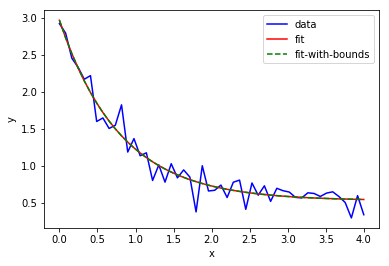

In [19]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
# define the data to be fit with some noise

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')
# Fit for the parameters a, b, c of the function func

popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')
# Constrain the optimization to the region of 0 < a < 3, 0 < b < 2 and 0 < c < 1:

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 2., 1.]))
plt.plot(xdata, func(xdata, *popt), 'g--', label='fit-with-bounds')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [20]:
def gaus_sum(numg):
    def gaus(x,*p):
        ng = numg
        he = p[0]
        sh = p[1]
        cn = p[2]
        return he*np.exp(-sh*(x-cn)**2)
    return gaus(x,200.0, 0.05, 130.0)

In [21]:
numg = 1

In [22]:
def gaus(x,*p):
    """Gaussian function.
    Args:
        x (float): variable.
    Returns:
        float: f(x), where he=height, sh=sharpness, cn=centroid.
    """
    ng = numg
    p1 = p[ng-1:]
    he = p1[0]
    sh = p1[1]
    cn = p1[2]
    return he*np.exp(-sh*(x-cn)**2)

In [23]:
def gaus_shfix(x,*p,sh=0.03):
    """Gaussian function.
    Args:
        x (float): variable.
    Returns:
        float: f(x), where he=height, sh=sharpness, cn=centroid.
    """
    ng = numg
    p1 = p[ng-1:]
    he = p1[0]
    # sh = p1[1]
    cn = p1[2]
    return he*np.exp(-sh*(x-cn)**2)

In [24]:
xs = np.linspace(100, 200)
ys = gaus(xs, 200.0, 0.05, 130.0)
# ............he......sh...cn.
rs = 7.0 * np.random.normal(size=xs.size)
yrs = ys + rs

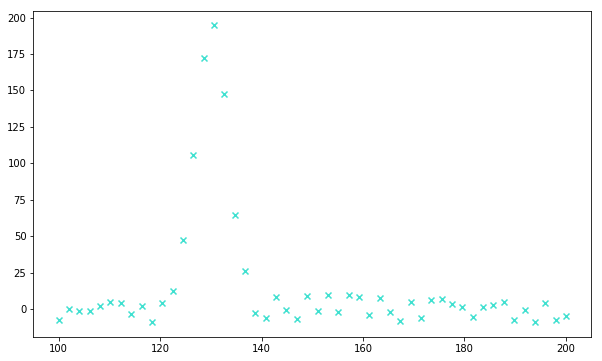

In [25]:
figB, axB = plt.subplots(1, 1, figsize=(10,6))
outB = axB.scatter(xs, yrs, marker='x', color='turquoise')

In [26]:
parms=(150,0.01,145.0)

In [27]:
popt, pcov = curve_fit(gaus,xs,yrs,p0=parms)

In [28]:
popt

array([1.96425393e+02, 4.84915263e-02, 1.30096258e+02])

In [29]:
pcov

array([[1.69153292e+01, 5.56785914e-03, 1.08593555e-07],
       [5.56785914e-03, 5.49815863e-06, 5.30119033e-11],
       [1.08593555e-07, 5.30119033e-11, 6.02735009e-03]])

In [30]:
perr = np.sqrt(np.diag(pcov))
perr

array([4.11282497e+00, 2.34481527e-03, 7.76360103e-02])

In [31]:
def gaus_shfix2(x,he,cn,sh):
    """Gaussian function.
    Args:
        x (float): variable.
    Returns:
        float: f(x), where he=height, sh=sharpness, cn=centroid.
    """
    # he = p1[0]
    # sh = p1[1]
    # cn = p1[2]
    return he*np.exp(-sh*(x-cn)**2)

In [32]:
parms2=(150,145.0, 0.01)

In [33]:
popt_shfix2, pcov_shfix2 = curve_fit(
    gaus_shfix2, xs, yrs, p0=parms2 )

In [34]:
popt_shfix2

array([1.96425393e+02, 1.30096258e+02, 4.84915263e-02])

In [35]:
sh=0.024

In [36]:
def gaus_shfix3(sh):
    def gaus_shfree(x,sh,he,cn):
        a = he*np.exp(-sh*(x-cn)**2)
        return a
    return gaus_shfree

In [37]:
parms3=(190.0, 137.0)

In [38]:
def gaussian(x,*p):
    ng = int( len(p) / 3)
    a = 0.0
    for i in range(ng):
        sh, he, cn = p[3*i+0], p[3*i+1], p[3*i+2]
        a += he*np.exp(-sh*(x-cn)**2)
    return a

In [39]:
def lorentzian(x,*p):
    gamma, he, x0 = p[0], p[1], p[2]
    a = he / ( np.pi * gamma * (1 + ((x-x0)/gamma)**2.0 ) )
    return a

In [40]:
def mix(x,*p):
    ng = numg
    p1 = p[:3*ng]
    p2 = p[3*ng:]
    # a = sumarray(gaussian(x,p1),lorentzian(x,p2))
    a = gaussian(x,p1)
    # b =  lorentzian(x,p2)
    return a

In [41]:
numg=2
numg

2

In [42]:
xs2 = np.linspace(11.0, 19.0)
ys2 = gaussian(xs2, 1.1, 150.0, 13.0, 0.9, 200.0, 17.1)
# ..................sh1..he1... cn1...sh2..he2...cn2 .
rs = 7.0 * np.random.normal(size=xs2.size)
yrs2 = ys2 + rs

In [54]:
(xs2, yrs2)

(array([11.        , 11.16326531, 11.32653061, 11.48979592, 11.65306122,
        11.81632653, 11.97959184, 12.14285714, 12.30612245, 12.46938776,
        12.63265306, 12.79591837, 12.95918367, 13.12244898, 13.28571429,
        13.44897959, 13.6122449 , 13.7755102 , 13.93877551, 14.10204082,
        14.26530612, 14.42857143, 14.59183673, 14.75510204, 14.91836735,
        15.08163265, 15.24489796, 15.40816327, 15.57142857, 15.73469388,
        15.89795918, 16.06122449, 16.2244898 , 16.3877551 , 16.55102041,
        16.71428571, 16.87755102, 17.04081633, 17.20408163, 17.36734694,
        17.53061224, 17.69387755, 17.85714286, 18.02040816, 18.18367347,
        18.34693878, 18.51020408, 18.67346939, 18.83673469, 19.        ]),
 array([ -3.37503047,   7.14314055,  20.96893647,   7.51913857,
         14.58219607,  39.30661961,  49.46453402,  68.50618821,
         83.69933916, 107.77349289, 128.20877105, 151.89224903,
        145.02598659, 141.64287612, 130.2937387 , 118.16756012,
        104.

In [43]:
gausinipars = (1.2, 130.0, 12.0, 0.8, 210.0, 16.0)
popt_gauss1, pcov_gauss1 = curve_fit(gaussian,xs2,yrs2,p0=gausinipars)
# leastsq, covar = curve_fit(gaussian,xs2,yrs2) nao funciona
popt_gauss1

array([  1.04308276, 147.53475506,  12.99520514,   0.90707923,
       198.82420522,  17.08193472])

In [44]:
perr = np.sqrt(np.diag(pcov_gauss1))
perr

array([0.04898288, 2.99672473, 0.01623578, 0.03061948, 2.89618275,
       0.01248115])

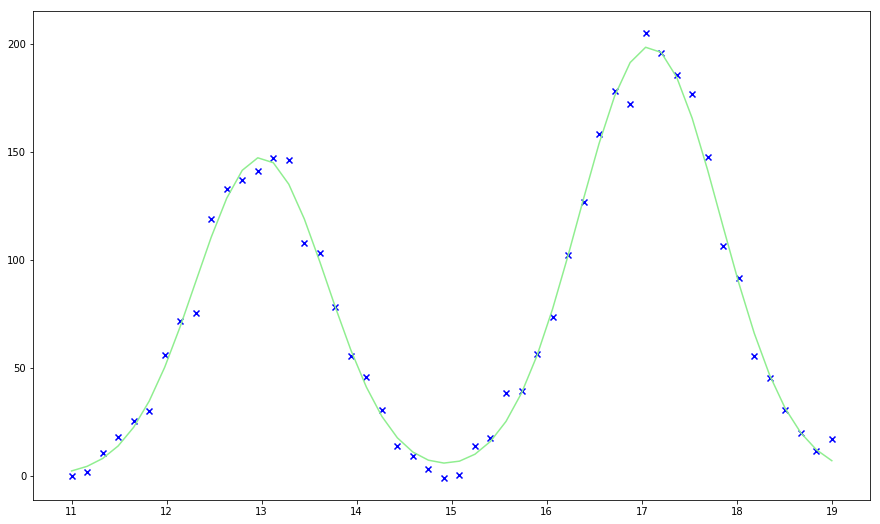

In [45]:
figC, axC = plt.subplots(1, 1, figsize=(15,9))
axC.scatter(xs2, yrs2, marker='x', color='blue')
axC.plot(xs2, gaussian(xs2, *popt_gauss1), color='lightgreen')

In [46]:
# Definindo fun,c~ao com shs fixos
def g1(*shs):
    def g2(x, *hescns):
        pcompl = np.array([])
        ng = int( len(hescns) / 2)
        for i in range(ng):
            pcompl = np.append(pcompl, (shs[i], hescns[2*i+0], hescns[2*i+1]))
        return gaussian(x,*pcompl)
    return g2

In [47]:
# testes
g3 = g1(1.1, 0.9)
g3_12pt9 = g3( 12.9, 150.0, 13.0, 200.0, 17.1 )
print('g3: ', g3)
print(g3_140)
pcompl_ext = np.array([  1.1, 150.,   13.,    0.9, 200.,   17.1])
print('gaussian: ', gaussian(12.9, *pcompl_ext))
print('gaussian: ', gaussian(12.9, 1.1, 150., 13., 0.9, 200., 17.1))
print('gaussian: ', g3( 12.9, 150.0, 13.0, 200.0, 17.1 ))
print('gaussian: ', g1(1.1, 0.9)( 12.9, 150.0, 13.0, 200.0, 17.1 ) )

g3:  <function g1.<locals>.g2 at 0x00000210602C1488>
45.34753225089062
gaussian:  148.35906729462607
gaussian:  148.35906729462607
gaussian:  148.35906729462607
gaussian:  148.35906729462607


In [48]:
xs2 = np.linspace(11.0, 19.0)
ys2 = gaussian(xs2, 1.1, 150.0, 13.0, 0.9, 200.0, 17.1)
# ..................sh1..he1... cn1...sh2..he2...cn2 .
rs = 7.0 * np.random.normal(size=xs2.size)
yrs2 = ys2 + rs

In [49]:
gausinipars2 = (130.0, 12.0, 210.0, 16.0)
popt_gauss2, pcov_gauss2 = curve_fit(g1(1.1, 0.9),xs2,yrs2,p0=gausinipars2)
popt_gauss2

array([149.01026623,  13.00085346, 200.89430534,  17.1004464 ])

In [50]:
perr2 = np.sqrt(np.diag(pcov_gauss2))
perr2

array([2.62526656, 0.01679922, 2.49690518, 0.01310939])

In [51]:
g1(1.1, 0.9)(12.9, *popt_gauss2)

147.35237317327974

In [53]:
xs2

array([11.        , 11.16326531, 11.32653061, 11.48979592, 11.65306122,
       11.81632653, 11.97959184, 12.14285714, 12.30612245, 12.46938776,
       12.63265306, 12.79591837, 12.95918367, 13.12244898, 13.28571429,
       13.44897959, 13.6122449 , 13.7755102 , 13.93877551, 14.10204082,
       14.26530612, 14.42857143, 14.59183673, 14.75510204, 14.91836735,
       15.08163265, 15.24489796, 15.40816327, 15.57142857, 15.73469388,
       15.89795918, 16.06122449, 16.2244898 , 16.3877551 , 16.55102041,
       16.71428571, 16.87755102, 17.04081633, 17.20408163, 17.36734694,
       17.53061224, 17.69387755, 17.85714286, 18.02040816, 18.18367347,
       18.34693878, 18.51020408, 18.67346939, 18.83673469, 19.        ])

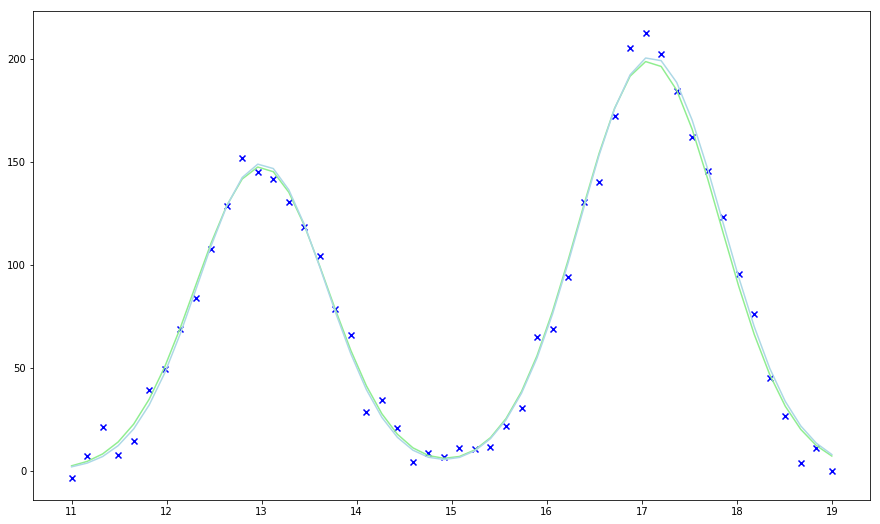

In [52]:
figC, axC = plt.subplots(1, 1, figsize=(15,9))
axC.scatter(xs2, yrs2, marker='x', color='blue')
axC.plot(xs2, gaussian(xs2, *popt_gauss1), color='lightgreen')
axC.plot(xs2, g1(1.1, 0.9)(xs2, *popt_gauss2), color='lightblue')